In [2]:
%pwd


'H:\\Basics-of-Unsupervised-learning'

### I will try to explain basics of unsupervised ML

## This  involves discovering pattern in Data

### we will try to discover pattern in iris data set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [4]:
df = pd.read_csv('Iris.csv' ,index_col=False)

In [5]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.drop(labels='Id' ,inplace=True ,axis=1)


In [7]:
df.drop(labels='Species' , inplace = True , axis=1)

In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [9]:
df = df.values   # This will convert whole data frame into Numpy 2D array

In [10]:
type(df)

numpy.ndarray

In [11]:
## let create a k-mean model
model = KMeans(n_clusters=3)

In [12]:
model.fit(df)  ## fit the data set into the model 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
labels = model.predict(df)

In [14]:
print(labels)  ## predict there clusters level

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [15]:
new_label = model.predict([[3.4 ,2.5 ,2.1,0.5]])  # prediction on new data set

In [16]:
new_label # assigned clusture

array([1])

### visualization based on clustering

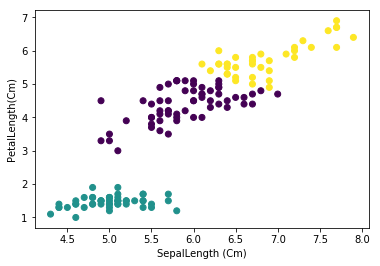

In [17]:
xs = df[:,0]
ys = df[:,2]
plt.scatter(xs ,ys ,c=labels)  ## c is used as clustering color on color for one cluster
plt.xlabel('SepalLength (Cm)')
plt.ylabel('PetalLength(Cm)')
plt.show()
%matplotlib inline

## KMeans assign level based on there "centroids" point will be assigned label basd n its nearest Cdentroid

## let's visualize centroid as well

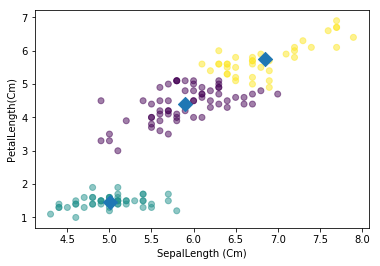

In [18]:
xs = df[:,0]
ys = df[:,2]
plt.scatter(xs ,ys ,c=labels ,alpha=0.5)  ## c is used as clustering color on color for one cluster
plt.xlabel('SepalLength (Cm)')
plt.ylabel('PetalLength(Cm)')
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x ,centroids_y ,marker='D' ,s=100)
plt.show()

### Point nearest to the centroid will recieve label of that centroid

In [19]:
centroids  ### Ypu can see the centroids assign for different dimensions

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

## Evaluating Clustering

In [20]:
labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
df2 = pd.read_csv('Iris.csv' ,usecols=['Species'])

In [22]:
df2.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [23]:
df2['labels'] = labels

In [24]:
df2.head()

,Species,labels
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1


In [25]:
ct = pd.crosstab(df2['labels'] , df2['Species'])

### In cross tabulation we made acroos table of different table

In [26]:
ct

Species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


### We can see that in cluster 1 there is only one category so this is perfect clustering 

#### Lower value of inertia is prefered 

In [27]:
print(model.inertia_)

78.9408414261


### let's see how many cluster we should choose

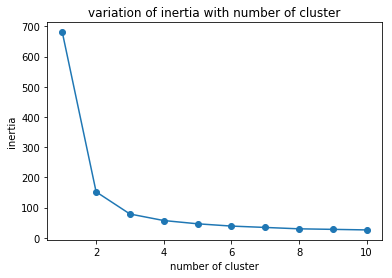

In [28]:
inertia = []
cluster = []
for i in range(10):
    model = KMeans(n_clusters=i+1)
    model.fit(df)
    inertia.append(model.inertia_)
    cluster.append(i+1)
    
plt.plot(cluster , inertia ,marker = 'o')
plt.ylabel("inertia")
plt.xlabel('number of cluster')
plt.title('variation of inertia with number of cluster')
plt.show()

### We can see that number = 3  this is our elbow point so we can take this as our default clusters number

In [29]:
ct ## we can see that there is some issue in number 2 cluste so let's remove that 

Species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


In [30]:
from sklearn.preprocessing import StandardScaler

### StandardScaler Method will make mean 0 and variance 1 for every data

In [31]:
for i in range(4):
    print(df[: ,i].std())

0.825301291785
0.432146580071
1.75852918341
0.760612618588


#### we can see that variance in the 3rd feature is very high compared to other features

In [32]:
for i in range(4):
    print(df[: ,i].mean())

5.84333333333
3.054
3.75866666667
1.19866666667


### mean is also varrying in forth and first propeties this amiss could make our model less effective
### so we have to remove these things and make there std and mean at same range

In [33]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaled_df = scaler.transform(df)   ## scaler will transform any new or same data into standarised version of df(sample)

In [35]:
for i in range(4):
    print(scaled_df[: ,i].std())
    
### Standard deviation became 1    

1.0
1.0
1.0
1.0


In [36]:
for i in range(4):
    print(scaled_df[: ,i].mean())
## Mean becomes approximately Zero for every data    

-4.73695157173e-16
-6.63173220043e-16
3.31586610021e-16
-2.84217094304e-16


### Now our data is perfectly Standarised


### To perform multiple steps on same data we can make pipeline


In [37]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler ,kmeans)
pipeline.fit(df)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [38]:
std_labels = pipeline.predict(df)

In [39]:
std_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [40]:
df2['std_labels'] = std_labels

In [41]:
df2.head()

,Species,labels,std_labels
0,Iris-setosa,1,1
1,Iris-setosa,1,1
2,Iris-setosa,1,1
3,Iris-setosa,1,1
4,Iris-setosa,1,1


In [42]:
std_ct = pd.crosstab(df2['std_labels'] ,df2['Species'])

In [43]:
std_ct

Species,Iris-setosa,Iris-versicolor,Iris-virginica
std_labels,,,
0,0,11,36
1,50,0,0
2,0,39,14


### There are many other preprocessing tools available in scikit learn read about them in documentation

In [44]:
print(df2.sort_values('labels').head())   # this will print them in sorted order by labels

            Species  labels  std_labels
74  Iris-versicolor       0           2
83  Iris-versicolor       0           2
82  Iris-versicolor       0           2
81  Iris-versicolor       0           2
80  Iris-versicolor       0           2


### T-SNE  is visualization tools for data in higher dimensions

In [45]:
from sklearn.manifold import TSNE

In [46]:
model  =TSNE(learning_rate=100)
transformed = model.fit_transform(df)

In [47]:
transformed[:6 ,:]   # we can see that our data is transformed into 2-D array

array([[ 15.09538651,  11.96696758],
       [ 17.47027206,  11.11544609],
       [ 18.01767349,  11.7690506 ],
       [ 18.09649277,  12.15510464],
       [ 15.06149292,  12.44064999],
       [ 13.27203846,  12.65423584]], dtype=float32)

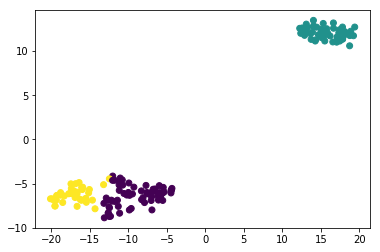

In [48]:
xt = transformed[: ,0]
yt = transformed[: ,1]
plt.scatter(xt ,yt ,c=labels)
plt.show()

## We can see that T-Sne divide our cluster into three differetnt group so this is great tool to use

#### Visualizing the PCA transformation


In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA()
pca.fit(df)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [55]:
features = range(pca.n_components_)

In [56]:
features

range(0, 4)

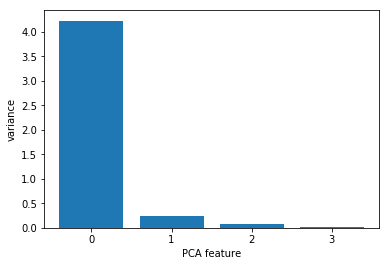

In [58]:
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

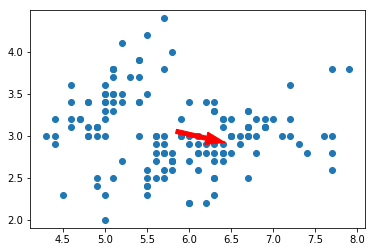

In [60]:
plt.scatter(df[:,0], df[:,1])


# Get the mean of the grain samples: mean
mean = pca.mean_

# Get the first principal component: first_pc
first_pc = pca.components_[0 ,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.05)

# Keep axes on same scale
plt.axis('equal')
plt.show()

#### This is the direction in which samples varies most

In [62]:
pca = PCA(n_components=2)
pca.fit(df)
transformed = pca.transform(df)

In [63]:
transformed.shape

(150, 2)

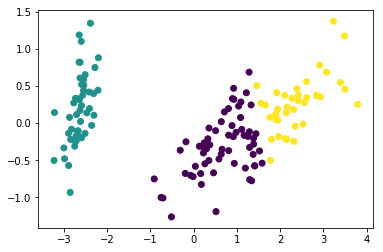

In [64]:
plt.scatter(transformed[: ,0] ,  transformed[: ,1] , c=labels)
plt.show()

#### It can be seen that on reducing dimension still it is easy to seperate them